<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/trabalho_final_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_total = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv')

### Colunas do dataset:
- **ID** - Identificador de entrada
- **Customer_ID** - ID cliente
- **Month** - Mês do ano
- **Name** - nome do cliente
- **Age** - Idade Cliente
- **SSN** - Social Security Number (CPF no Brasil)
- **Occupation** - Ocupação do cliente
- **Annual_Income** - renda anual
- **Monthly_Inhand_Salary** - Salario mensal do cliente
- **Num_Bank_Accounts** - quantidade de contas em bancos
- **Num_Credit_Card** - quantidade de cartões de crédito
- **Interest_Rate** - taxa de juros cartão de crédito
- **Num_of_Loan** - Quantidade de empréstimos feitos no banco
- **Type_of_Loan** - tipo de empréstimo feito pelo cliente
- **Delay_from_due_date** - qtd. de dias de atraso pagamento cartão
- **Num_of_Delayed_Payment** - Média de pagamentos atrasado pelo cliente
- **Changed_Credit_Limit** - Variação percentual de limite do cartão de crédito
- **Num_Credit_Inquiries** - Quantidade de "cobranças" no cartão
- **Credit_Mix** - mix de crédito do cliente
- **Outstanding_Debt** - restante à ser pago da dívida
- **Credit_Utilization_Ratio** - Taxa de utlização do cartão de crédito
- **Credit_History_Age** - Tempo de histórico de crédito do cliente
- **Payment_of_Min_Amount** - Pagamento minimo
- **Total_EMI_per_month** - Parcela mensal de amortização de empréstimo
- **Amount_invested_monthly** - Quantidade de dinheiro investido pelo cliente mensalmente
- **Payment_Behaviour** - Comportamento de pagamento cliente
- **Monthly_Balance** - Saldo Mensal Cliente
- **Credit_Score** - Target, Pontuação de uso de crédito


In [3]:
# Avaliando as variaveis do dataset
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        83144 non-null  object 
 1   Customer_ID               83144 non-null  object 
 2   Month                     83144 non-null  object 
 3   Name                      74822 non-null  object 
 4   Age                       83144 non-null  object 
 5   SSN                       83144 non-null  object 
 6   Occupation                83144 non-null  object 
 7   Annual_Income             83144 non-null  object 
 8   Monthly_Inhand_Salary     70703 non-null  float64
 9   Num_Bank_Accounts         83144 non-null  int64  
 10  Num_Credit_Card           83144 non-null  int64  
 11  Interest_Rate             83144 non-null  int64  
 12  Num_of_Loan               83144 non-null  object 
 13  Type_of_Loan              73622 non-null  object 
 14  Delay_

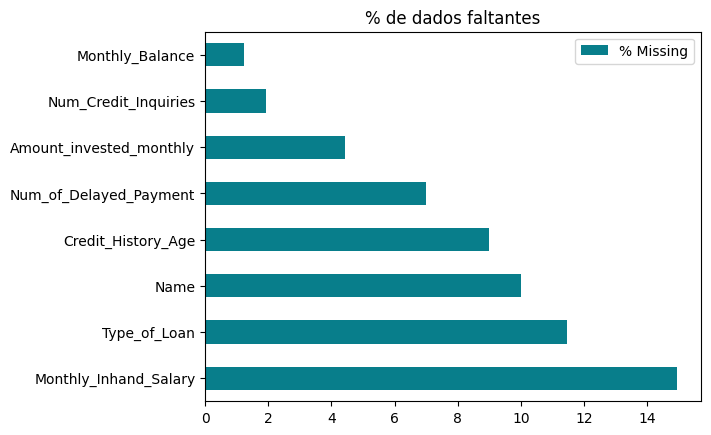

In [4]:
# Esta função define a quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'% Missing' :na_df})
        missing_data.plot(kind = "barh", color='#087E8B')
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')

plot_nas(df_total)

In [5]:
df_total.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [6]:
# Campos númericos que estão como string - retirar underline dos numeros

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_', '')

In [7]:
# Removendo coluna ID, completamente inútil para a análise
df_total.drop(['ID'], axis = 1, inplace = True)

# removendo caracter estranho do SSN
df_total['SSN'].replace('#F%$D@*&8', np.NaN, inplace=True)

# removendo os underlines e colocando NaN nas colunas Occupation, Changed_Credit_Limit, Credit_Mix
df_total['Occupation'].replace('_______', np.NaN, inplace=True)

df_total['Changed_Credit_Limit'].replace(['_', ''], np.NaN, inplace=True)

df_total['Credit_Mix'].replace('_', np.NaN, inplace=True)

# removendo os erros de digitacao e colocando NaN nas colunas Payment_of_Min_Amount, Payment_Behaviour
df_total['Payment_of_Min_Amount'].replace('NM', np.NaN, inplace=True)

df_total['Payment_Behaviour'].replace('!@9#%8', np.NaN, inplace=True)

In [8]:
# convertendo Credit_History_Age em quantidade de meses
def converter_mes(x):
    if pd.notnull(x):
        ano = int(x.split(' ')[0])
        mes = int(x.split(' ')[3])
        return (ano*12)+mes
    else:
        return x

df_total['Credit_History_Age'] = df_total['Credit_History_Age'].apply(lambda x: converter_mes(x)).astype(float)

In [9]:
# Conversão dos dados

dicionario_conversao = {
    'Age': int,
    'Num_Bank_Accounts': int,
    'Num_Credit_Card': int,
    'Num_of_Loan': int,
    'Num_of_Delayed_Payment': int,
    'Annual_Income' : float,
    'Monthly_Inhand_Salary' : float,
    'Interest_Rate' : float,
    'Delay_from_due_date' : float,
    'Changed_Credit_Limit' : float,
    'Num_Credit_Inquiries' : float,
    'Outstanding_Debt' : float,
    'Credit_Utilization_Ratio' : float,
    'Changed_Credit_Limit' : float,
    'Amount_invested_monthly' : float,
    'Total_EMI_per_month' : float,
    'Num_of_Delayed_Payment' : float,
    'Monthly_Balance' : float,
    'Customer_ID' : object,
    'Name' : object,
    'Month' : object,
    'SSN' : object,
    'Type_of_Loan' : object,
    'Occupation' : object,
    'Credit_Mix' : object,
    'Payment_of_Min_Amount' : object,
    'Payment_Behaviour' : object
    }
# aplicando as type para variaveis

df_total = df_total.astype(dicionario_conversao)

In [10]:
df_total_bkp = df_total.copy()

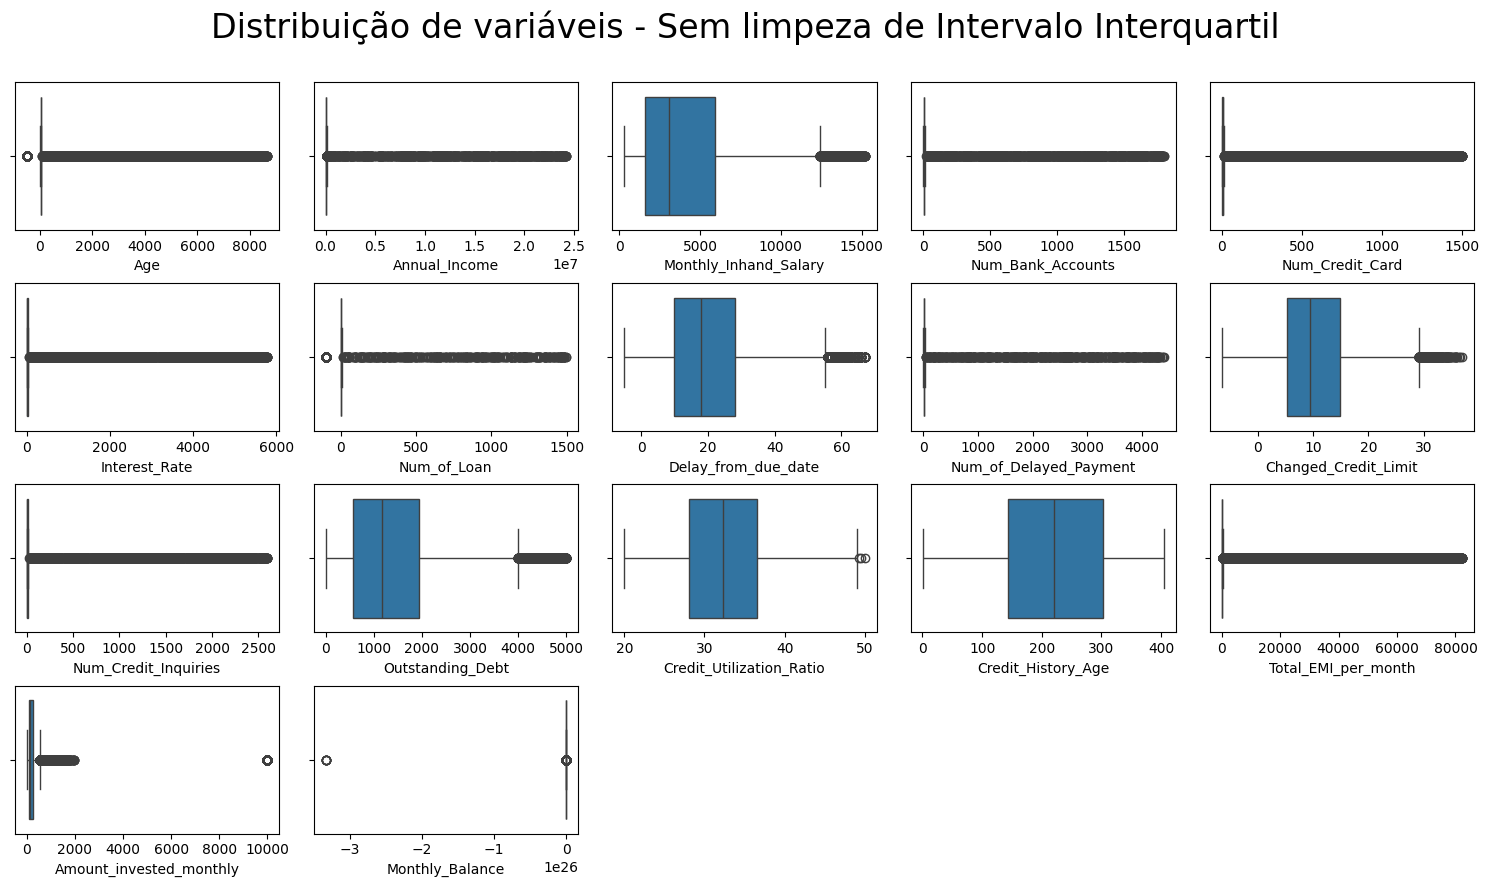

In [11]:
fig = plt.figure(figsize= (15,9))

num_cols = list(df_total.select_dtypes(exclude='object').columns)

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(x=df_total[col], ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

fig.suptitle('Distribuição de variáveis - Sem limpeza de Intervalo Interquartil\n', size = 24)
plt.subplots_adjust(top=0.90)
plt.show()

In [12]:
regras_de_negocio_moda = {
    'Age': (df_total['Age'] >= 18) & (df_total['Age'] <= 100),
    'Annual_Income': (df_total['Annual_Income'] >= 0) & (df_total['Annual_Income'] <= 1000000),
    'Num_Bank_Accounts': (df_total['Num_Bank_Accounts'] >= 0) & (df_total['Num_Bank_Accounts'] <= 20),
    'Num_Credit_Card': (df_total['Num_Credit_Card'] >= 0) & (df_total['Num_Credit_Card'] <= 20),
    'Interest_Rate': (df_total['Interest_Rate'] >= 0) & (df_total['Interest_Rate'] <= 100),
    'Num_of_Loan': (df_total['Num_of_Loan'] >= 0) & (df_total['Num_of_Loan'] <= 100),
    'Num_of_Delayed_Payment': (df_total['Num_of_Delayed_Payment'] >= 0) & (df_total['Num_of_Delayed_Payment'] <= 100),
    'Num_Credit_Inquiries': (df_total['Num_Credit_Inquiries'] >= 0) & (df_total['Num_Credit_Inquiries'] <= 100),
    'Total_EMI_per_month': (df_total['Total_EMI_per_month'] >= 0) & (df_total['Total_EMI_per_month'] <= 1000),
    # 'Amount_invested_monthly': (df_total['Amount_invested_monthly'] >= 0) & (df_total['Amount_invested_monthly'] <= 10000),
    # 'Monthly_Balance': (df_total['Monthly_Balance'] >= -10000) & (df_total['Monthly_Balance'] <= 100000)
}

regras_de_negocio_mediana = {
    'Monthly_Balance' : (df_total['Monthly_Balance'] <= -10000) & (df_total['Monthly_Balance'] <= 100000)
}

In [13]:
def replace_out_of_range_with_mode(df, column, mask):
    """
    Substitui os valores em uma coluna especificada de um DataFrame onde a máscara é False
    pela moda dessa coluna para cada 'Customer_ID'.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    column (str): O nome da coluna onde a substituição pela moda será aplicada.
    mask (pd.Series): Máscara booleana que indica o intervalo válido. Os valores False serão substituídos pela moda.

    Retorna:
    pd.DataFrame: O DataFrame com a coluna especificada atualizada.
    """
    # Calculate the mode of the specified column for each 'Customer_ID'
    mode_col = df.groupby('Customer_ID')[column].transform(lambda x: x.mode()[0])

    # Replace values where mask is False with the mode
    df[column] = np.where(~mask, mode_col, df[column])

    return df

def apply_mode_replacement(df, columns_masks):
    """
    Aplica a função de substituição pela moda iterativamente a múltiplas colunas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    columns_masks (dict): Um dicionário onde as chaves são os nomes das colunas e os valores são as máscaras correspondentes.

    Retorna:
    pd.DataFrame: O DataFrame com todas as colunas especificadas atualizadas.
    """
    for column, mask in columns_masks.items():
        df = replace_out_of_range_with_mode(df, column, mask)
    return df

def replace_out_of_range_with_median(df, column, mask):
    """
    Substitui os valores em uma coluna especificada de um DataFrame onde a máscara é False
    pela moda dessa coluna para cada 'Customer_ID'.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    column (str): O nome da coluna onde a substituição pela moda será aplicada.
    mask (pd.Series): Máscara booleana que indica o intervalo válido. Os valores False serão substituídos pela moda.

    Retorna:
    pd.DataFrame: O DataFrame com a coluna especificada atualizada.
    """
    # Calculate the mode of the specified column for each 'Customer_ID'
    median_col = df.groupby('Customer_ID')[column].transform(lambda x: x.median()[0])

    # Replace values where mask is False with the mode
    df[column] = np.where(mask, median_col, df[column])

    return df

def apply_median_replacement(df, columns_masks):
    """
    Aplica a função de substituição pela moda iterativamente a múltiplas colunas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame de entrada.
    columns_masks (dict): Um dicionário onde as chaves são os nomes das colunas e os valores são as máscaras correspondentes.

    Retorna:
    pd.DataFrame: O DataFrame com todas as colunas especificadas atualizadas.
    """
    for column, mask in columns_masks.items():
        df = replace_out_of_range_with_mode(df, column, mask)
    return df

In [14]:
# aplicando funcoes
df_total = apply_mode_replacement(df_total, regras_de_negocio_moda)
df_total = apply_median_replacement(df_total, regras_de_negocio_mediana)

# existe um customer_id que em todos os registros o monthly_balance está com o valor ruim
# dropando esses registros
df_total.loc[df_total['Monthly_Balance'] < 0]['Customer_ID'].unique()
df_total.loc[df_total['Customer_ID'].isin(['CUS_0x9885', 'CUS_0x5a90', 'CUS_0x288d', 'CUS_0x85e9', 'CUS_0x2b77', 'CUS_0xc06e', 'CUS_0x57f3'])].head(3)
df_total = df_total[~df_total['Customer_ID'].isin(['CUS_0x9885', 'CUS_0x5a90', 'CUS_0x288d', 'CUS_0x85e9', 'CUS_0x2b77', 'CUS_0xc06e', 'CUS_0x57f3'])]

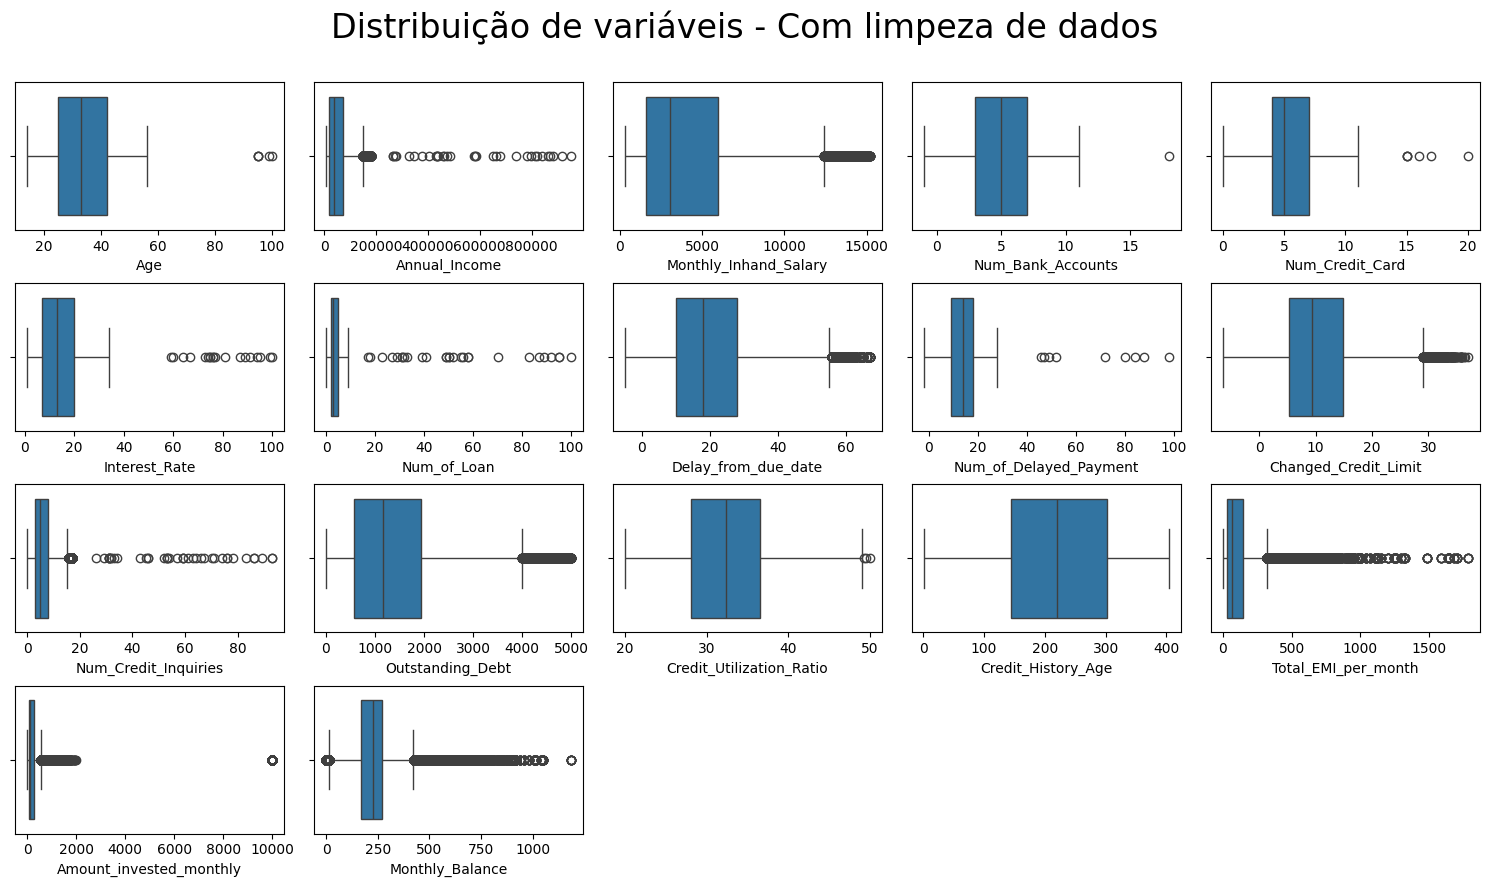

In [16]:
fig = plt.figure(figsize= (15,9))

num_cols = list(df_total.select_dtypes(exclude='object').columns)

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(x=df_total[col], ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

fig.suptitle('Distribuição de variáveis - Com limpeza de dados\n', size = 24)
plt.subplots_adjust(top=0.90)
plt.show()